In [663]:
import pandas as pd
import statistics as stats
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas_profiling
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder  
from sklearn.model_selection import train_test_split

In [623]:
data1 = pd.read_csv('data/measurements.csv')

In [624]:
data2 = pd.read_excel('data/measurements2.xlsx')

In [625]:
data1.head()

distance consume  speed temp_inside  temp_outside specials gas_type  AC  \
0       28       5     26        21,5            12      NaN      E10   0   
1       12     4,2     30        21,5            13      NaN      E10   0   
2     11,2     5,5     38        21,5            15      NaN      E10   0   
3     12,9     3,9     36        21,5            14      NaN      E10   0   
4     18,5     4,5     46        21,5            15      NaN      E10   0   

   rain  sun refill liters refill gas  
0     0    0            45        E10  
1     0    0           NaN        NaN  
2     0    0           NaN        NaN  
3     0    0           NaN        NaN  
4     0    0           NaN        NaN

In [626]:
col_to_numeric = ['temp_inside', "distance", "consume"]

In [627]:
for col in col_to_numeric:
    for row in data1[col]:
        data1[col] = data1[col].str.replace(",",".")
    else:
        pass
        
    data1[col] =  pd.to_numeric(data1[col], errors='coerce')

In [628]:
data2.head()

distance  consume  speed  temp_inside  temp_outside specials gas_type  AC  \
0      28.0      5.0     26         21.5            12      NaN      E10   0   
1      12.0      4.2     30         21.5            13      NaN      E10   0   
2      11.2      5.5     38         21.5            15      NaN      E10   0   
3      12.9      3.9     36         21.5            14      NaN      E10   0   
4      18.5      4.5     46         21.5            15      NaN      E10   0   

   rain  sun  refill liters refill gas  
0     0    0           45.0        E10  
1     0    0            NaN        NaN  
2     0    0            NaN        NaN  
3     0    0            NaN        NaN  
4     0    0            NaN        NaN

In [629]:
data = pd.concat([data1, data2], axis =0)

In [630]:
data

distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12      NaN      E10   
1        12.0      4.2     30         21.5            13      NaN      E10   
2        11.2      5.5     38         21.5            15      NaN      E10   
3        12.9      3.9     36         21.5            14      NaN      E10   
4        18.5      4.5     46         21.5            15      NaN      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18      NaN     SP98   
384      16.1      4.3     38         25.0            31       AC     SP98   
385      16.0      3.8     45         25.0            19      NaN     SP98   
386      15.4      4.6     42         25.0            31       AC     SP98   
387      14.7      5.0     25         25.0            30       AC     SP98   

     AC  rain  sun refill liters refill gas  
0     0     0    0            45        E10  
1     0     0    0           NaN        NaN  
2     0     0    0           NaN        NaN  
3     0     0    0           NaN        NaN  
4     0     0    0           NaN        NaN  
..   ..   ...  ...           ...        ...  
383   0     0    0           NaN        NaN  
384   1     0    0           NaN        NaN  
385   0     0    0           NaN        NaN  
386   1     0    0           NaN        NaN  
387   1     0    0           NaN        NaN  

[776 rows x 12 columns]

In [631]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       24
temp_outside       0
specials         590
gas_type           0
AC                 0
rain               0
sun                0
refill liters    750
refill gas       750
dtype: int64

In [632]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [633]:
data = data.drop(["refill liters", "refill gas"], axis = 1)

In [634]:
data["specials"].value_counts(dropna=False)

NaN                   590
rain                   64
sun                    54
AC rain                18
ac                     16
AC                     12
snow                    6
sun ac                  6
AC snow                 2
half rain half sun      2
AC sun                  2
AC Sun                  2
ac rain                 2
Name: specials, dtype: int64

In [635]:
data['specials'] = data['specials'].fillna("other")

In [636]:
data['specials'] = np.where(data['specials'].str.contains("snow"), "snow", data['specials'])

In [637]:
data['specials'] = np.where(data['specials'].str.contains("half"), "other", data['specials'])

In [638]:
data['specials'] = np.where(data['specials'].str.contains("[Ss]un"), "sun", data['specials'])

In [639]:
data['specials'] = np.where(data['specials'].str.contains("rain"), "rain", data['specials'])

In [640]:
data['specials'] = np.where(data['specials'].str.contains("ac"), "other", data['specials'])

In [641]:
data['specials'] = np.where(data['specials'].str.contains("AC"), "other", data['specials'])

In [642]:
data["specials"].value_counts(dropna=False)

other    620
rain      84
sun       64
snow       8
Name: specials, dtype: int64

In [666]:
data.temp_inside = data.temp_inside.fillna(np.mean(data.temp_inside))

In [668]:
data

distance  consume  speed  temp_inside  temp_outside specials gas_type  \
0        28.0      5.0     26         21.5            12    other      E10   
1        12.0      4.2     30         21.5            13    other      E10   
2        11.2      5.5     38         21.5            15    other      E10   
3        12.9      3.9     36         21.5            14    other      E10   
4        18.5      4.5     46         21.5            15    other      E10   
..        ...      ...    ...          ...           ...      ...      ...   
383      16.0      3.7     39         24.5            18    other     SP98   
384      16.1      4.3     38         25.0            31    other     SP98   
385      16.0      3.8     45         25.0            19    other     SP98   
386      15.4      4.6     42         25.0            31    other     SP98   
387      14.7      5.0     25         25.0            30    other     SP98   

     AC  rain  sun  
0     0     0    0  
1     0     0    0  
2     0     0    0  
3     0     0    0  
4     0     0    0  
..   ..   ...  ...  
383   0     0    0  
384   1     0    0  
385   0     0    0  
386   1     0    0  
387   1     0    0  

[776 rows x 10 columns]

In [667]:
data.describe().T

count       mean        std   min    25%   50%   75%    max
distance      776.0  19.652835  22.653208   1.3  11.80  14.6  19.0  216.1
consume       776.0   4.912371   1.032505   3.3   4.30   4.7   5.3   12.2
speed         776.0  41.927835  13.589747  14.0  32.75  40.5  50.0   90.0
temp_inside   776.0  21.929521   0.994024  19.0  21.50  22.0  22.5   25.5
temp_outside  776.0  11.358247   6.987030  -5.0   7.00  10.0  16.0   31.0
AC            776.0   0.077320   0.267270   0.0   0.00   0.0   0.0    1.0
rain          776.0   0.123711   0.329464   0.0   0.00   0.0   0.0    1.0
sun           776.0   0.082474   0.275263   0.0   0.00   0.0   0.0    1.0

In [ ]:
#Consumption by gas-type

In [654]:
df =data.pivot_table(index= ['gas_type'], values = ['consume','distance', 'speed'], aggfunc = {'consume':'mean','distance':'mean', 'speed':'mean'}).reset_index()

In [655]:
df

gas_type   consume   distance      speed
0      E10  4.931250  21.096250  43.506250
1     SP98  4.899123  18.639912  40.820175

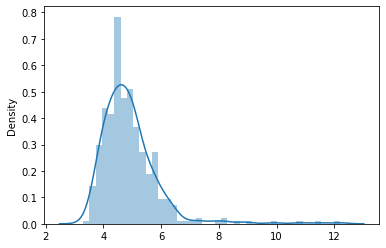

In [659]:
sns.distplot(x=data['consume'])
plt.show()

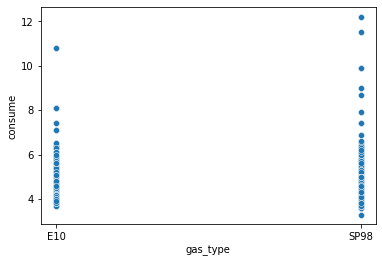

In [661]:
sns.scatterplot(x='gas_type',y='consume',data=data)
plt.show()

In [665]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]